In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
PCA_data_all = pd.read_csv("PCA Compiled Radiomics With 83.csv")
PCA_data_info_gain = pd.read_csv("Information Gain Real Updated.csv")
PCA_data_RFE = pd.read_csv("RFE Real Updated.csv")

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
PCA_data_all_scaled = scaler.fit_transform(PCA_data_all)
PCA_data_info_gain_scaled = scaler.fit_transform(PCA_data_info_gain)
PCA_data_RFE_scaled = scaler.fit_transform(PCA_data_RFE)

# statistics of scaled data
pd.DataFrame(PCA_data_all_scaled, columns = PCA_data_all.columns).describe()
pd.DataFrame(PCA_data_info_gain_scaled, columns = PCA_data_info_gain.columns).describe()
pd.DataFrame(PCA_data_RFE_scaled, columns = PCA_data_RFE.columns).describe()

,diagnostics_Image-original_Mean,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,...,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,...,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,83.000000
mean,8.199599e-16,1.979675e-16,2.661860e-16,-9.497089e-17,1.083471e-16,-2.006427e-17,4.628159e-16,4.012854e-18,-5.722497e-16,7.490661e-17,...,-3.905845e-16,8.025709e-18,-2.591635e-16,6.688091e-17,-5.350472e-18,1.377747e-16,-5.163206e-16,4.012854e-17,2.427777e-16,0.000000
std,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,...,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079e+00,1.006079
min,-2.190672e+00,-1.231508e+00,-1.143210e+00,-8.681024e-01,-7.491148e-01,-9.767181e-01,-1.900651e+00,-8.368684e-01,-1.997361e+00,-7.539073e-01,...,-2.114317e+00,-8.577437e-01,-1.118677e+00,-1.231404e+00,-1.104316e+00,-1.574552e+00,-1.767064e+00,-9.716792e-01,-1.472044e+00,-1.034323
25%,-6.909947e-01,-9.290701e-01,-8.038953e-01,-7.751475e-01,-6.453089e-01,-7.340621e-01,-6.646649e-01,-6.744001e-01,-7.365479e-01,-6.448809e-01,...,-5.177542e-01,-6.909367e-01,-6.368977e-01,-7.624846e-01,-6.781468e-01,-5.774268e-01,-5.311183e-01,-7.132359e-01,-7.440068e-01,-0.708179
50%,-2.145983e-01,-2.534093e-01,-3.632207e-01,-4.379676e-01,-4.004572e-01,-4.037697e-01,-1.429436e-01,-3.772269e-01,-1.151333e-01,-3.956044e-01,...,-1.678407e-01,-3.225147e-01,-2.814440e-01,-1.950431e-01,-3.013605e-01,-1.892953e-01,-1.519007e-01,-2.563191e-01,-2.912609e-01,-0.287442
75%,7.154074e-01,7.406119e-01,6.299143e-01,4.597481e-01,1.578554e-01,3.160714e-01,6.479842e-01,1.888137e-01,5.660736e-01,1.433650e-01,...,5.374130e-01,2.782008e-01,2.246093e-01,7.641618e-01,3.345406e-01,2.491275e-01,3.101289e-01,3.367899e-01,5.290052e-01,0.301778
max,2.260672e+00,2.840006e+00,2.823548e+00,2.910963e+00,4.173792e+00,3.043864e+00,2.427944e+00,3.157802e+00,2.306689e+00,4.100952e+00,...,3.329526e+00,3.780700e+00,3.843555e+00,3.164585e+00,3.566319e+00,3.345605e+00,3.823348e+00,4.909995e+00,3.921095e+00,4.140370


In [ ]:
pd.DataFrame(PCA_data_RFE_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.850794,1.252843,-0.249267,-0.615928,0.117420,-0.445167,0.608856,-0.148163,-1.528484,0.114045,...,-0.118852,-0.292427,-0.078061,-0.419118,0.240304,0.146545,0.040427,-0.419533,-0.623905,-0.230429
1,0.260982,-0.255207,-0.461915,-0.408093,-0.629737,-0.156843,-0.392932,-0.600306,1.557865,-0.613935,...,3.103964,-0.623904,1.334782,-0.968123,-1.104316,1.574075,2.254893,-0.778765,0.074070,-0.246177
2,-0.266034,-1.231508,-0.691475,2.398467,-0.580591,-0.724922,0.821598,-0.635670,-0.265989,-0.577536,...,1.112684,-0.719350,-0.229174,-0.150303,-0.826934,0.085536,0.365788,-0.086614,1.411420,0.859619
3,0.075677,-0.981482,0.028961,2.225153,0.184224,-0.440277,0.304523,-0.049561,-1.412293,0.163648,...,-0.876084,-0.258259,-0.958806,1.531420,0.904700,-0.914396,-0.814686,1.873898,0.403872,0.327071
4,0.994708,-1.088497,0.452396,-0.474418,-0.078727,0.553959,-1.066565,0.168512,0.260320,-0.117045,...,0.037154,-0.322515,-0.913367,3.117162,-0.117956,-0.616725,-0.488476,4.909995,2.345167,1.301069


In [ ]:
PCA_data_all_scaled_dataframe = pd.DataFrame(PCA_data_all_scaled, columns = PCA_data_all.columns)
PCA_data_info_gain_scaled_dataframe = pd.DataFrame(PCA_data_info_gain_scaled, columns=PCA_data_info_gain.columns)
PCA_data_RFE_scaled_dataframe = pd.DataFrame(PCA_data_RFE_scaled, columns=PCA_data_RFE.columns)

In [ ]:
PCA_data_all_scaled_dataframe.shape

(83, 112)

In [ ]:
PCA_data_info_gain_scaled_dataframe.shape

(83, 45)

In [ ]:
PCA_data_RFE_scaled_dataframe.shape

(83, 34)

In [ ]:
from sklearn.decomposition import PCA

pca_all = PCA(n_components = 83, random_state = 2020)
pca_all.fit(PCA_data_all_scaled_dataframe)
x_pca_all = pca_all.transform(PCA_data_all_scaled_dataframe)

In [ ]:
print("Variance explained by 83 principal components =", sum(pca_all.explained_variance_ratio_ * 100))

Variance explained by 83 principal components = 100.00000000000003


In [ ]:
pca_all.explained_variance_ratio_ * 100

array([5.05711911e+01, 1.78755997e+01, 6.52996398e+00, 4.39989301e+00,
       3.37706580e+00, 2.90298353e+00, 2.39782137e+00, 1.80630511e+00,
       1.41679492e+00, 1.22318986e+00, 9.51748710e-01, 8.75334143e-01,
       7.31243411e-01, 6.61056808e-01, 6.09780601e-01, 5.48291057e-01,
       3.94273569e-01, 3.44107216e-01, 2.92198425e-01, 2.46740023e-01,
       2.36951559e-01, 2.02819958e-01, 1.81759237e-01, 1.58416883e-01,
       1.28605359e-01, 1.03952617e-01, 1.00390136e-01, 9.58041480e-02,
       7.53575505e-02, 6.98670915e-02, 6.37894933e-02, 5.44542687e-02,
       4.54142467e-02, 3.77036426e-02, 3.69630979e-02, 3.52377519e-02,
       2.92730328e-02, 2.61284172e-02, 2.08050954e-02, 1.76127437e-02,
       1.63642335e-02, 1.35767721e-02, 1.22798012e-02, 1.06626756e-02,
       9.58970595e-03, 8.26878201e-03, 6.56223979e-03, 5.38612502e-03,
       5.24663462e-03, 4.25805105e-03, 3.56353780e-03, 3.50860847e-03,
       3.00758944e-03, 2.79422482e-03, 2.49273531e-03, 1.96817267e-03,
      

In [ ]:
np.cumsum(pca_all.explained_variance_ratio_ * 100)

array([ 50.57119109,  68.44679077,  74.97675475,  79.37664776,
        82.75371356,  85.65669709,  88.05451846,  89.86082356,
        91.27761849,  92.50080835,  93.45255706,  94.3278912 ,
        95.05913461,  95.72019142,  96.32997202,  96.87826308,
        97.27253665,  97.61664386,  97.90884229,  98.15558231,
        98.39253387,  98.59535383,  98.77711306,  98.93552995,
        99.06413531,  99.16808792,  99.26847806,  99.36428221,
        99.43963976,  99.50950685,  99.57329634,  99.62775061,
        99.67316486,  99.7108685 ,  99.7478316 ,  99.78306935,
        99.81234238,  99.8384708 ,  99.8592759 ,  99.87688864,
        99.89325287,  99.90682964,  99.91910945,  99.92977212,
        99.93936183,  99.94763061,  99.95419285,  99.95957897,
        99.96482561,  99.96908366,  99.9726472 ,  99.97615581,
        99.9791634 ,  99.98195762,  99.98445036,  99.98641853,
        99.98832474,  99.990191  ,  99.99163951,  99.99305355,
        99.99423056,  99.99509734,  99.99590189,  99.99

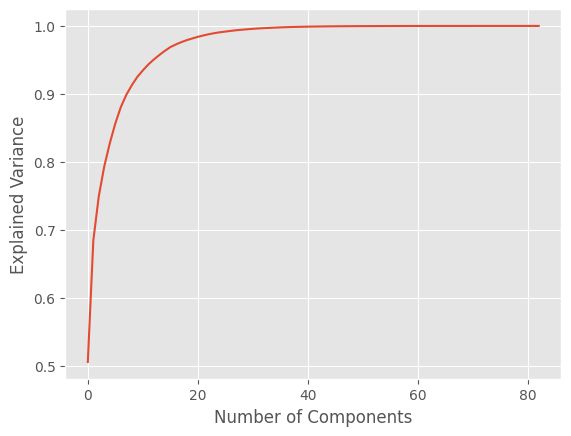

In [ ]:
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.savefig('elbow_plot.png', dpi=100)

In [ ]:
pca_2_all = PCA(n_components=2, random_state=2020)
pca_2_all.fit(PCA_data_all_scaled_dataframe)
X_pca_2_all = pca_2_all.transform(PCA_data_all_scaled_dataframe)
X_pca_2_all.shape

(83, 2)

In [ ]:
import pandas as pd

master_sheet = pd.read_csv("PCA Master Sheet With 83.csv")
master_sheet_frame = pd.DataFrame(master_sheet)

stroke = []
myocardial = []
anticoagulant = []
hypertension = []
surgery = []

for i in range(83):
  if master_sheet_frame.iloc[i][7] == "Y":
    stroke.append("Y")
  elif master_sheet_frame.iloc[i][7] == "N":
    stroke.append("N")
  else:
    stroke.append("Nan")

for i in range(83):
  if master_sheet_frame.iloc[i][9] == "Y":
    hypertension.append("Y")
  elif master_sheet_frame.iloc[i][9] == "N":
    hypertension.append("N")
  else:
    hypertension.append("Nan")

for i in range(83):
  if master_sheet_frame.iloc[i][10] == "Y":
    anticoagulant.append("Y")
  elif master_sheet_frame.iloc[i][10] == "N":
    anticoagulant.append("N")
  else:
    anticoagulant.append("Nan")

for i in range(83):
  if master_sheet_frame.iloc[i][12] == "Y":
    surgery.append("Y")
  elif master_sheet_frame.iloc[i][12] == "N":
    surgery.append("N")
  else:
    surgery.append("Nan")

for i in range(83):
  if master_sheet_frame.iloc[i][13] == "Y":
    myocardial.append("Y")
  elif master_sheet_frame.iloc[i][13] == "N":
    myocardial.append("N")
  else:
    myocardial.append("Nan")

#print(stroke)
stroke_frame = pd.DataFrame(stroke)
myocardial_frame = pd.DataFrame(myocardial)
anticoagulant_frame = pd.DataFrame(anticoagulant)
hypertension_frame = pd.DataFrame(hypertension)
surgery_frame = pd.DataFrame(surgery)

In [ ]:
stroke_frame.to_csv('stroke_frame.csv', index=False)

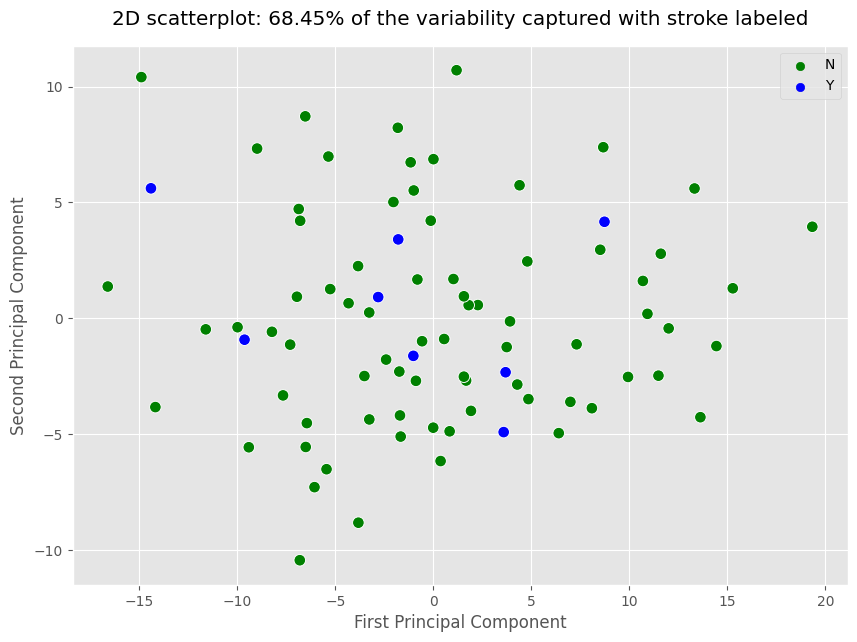

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_all[:, 0], y=X_pca_2_all[:, 1], s=70, hue=stroke, palette=['green', 'blue'])

plt.title("2D scatterplot: 68.45% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

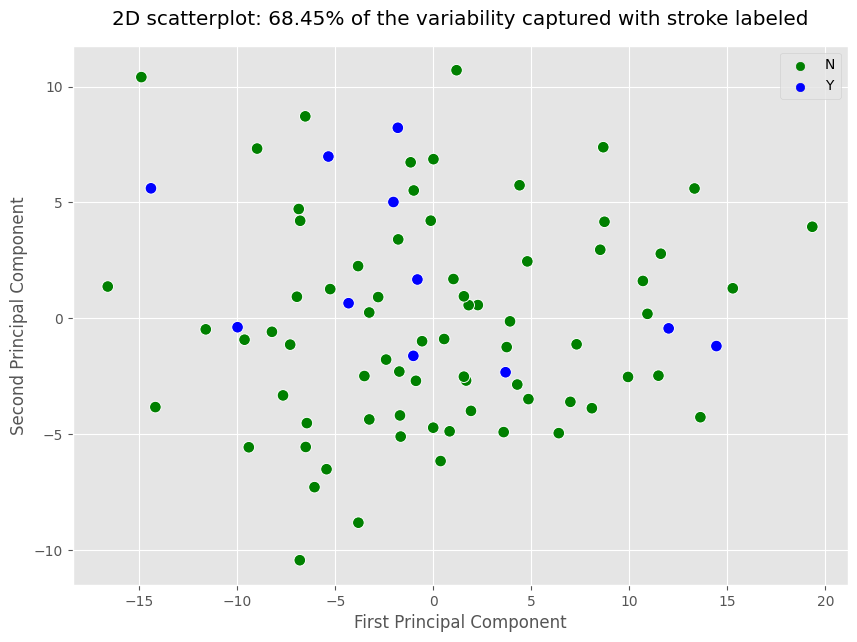

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_all[:, 0], y=X_pca_2_all[:, 1], s=70, hue=myocardial, palette=['green', 'blue'])

plt.title("2D scatterplot: 68.45% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

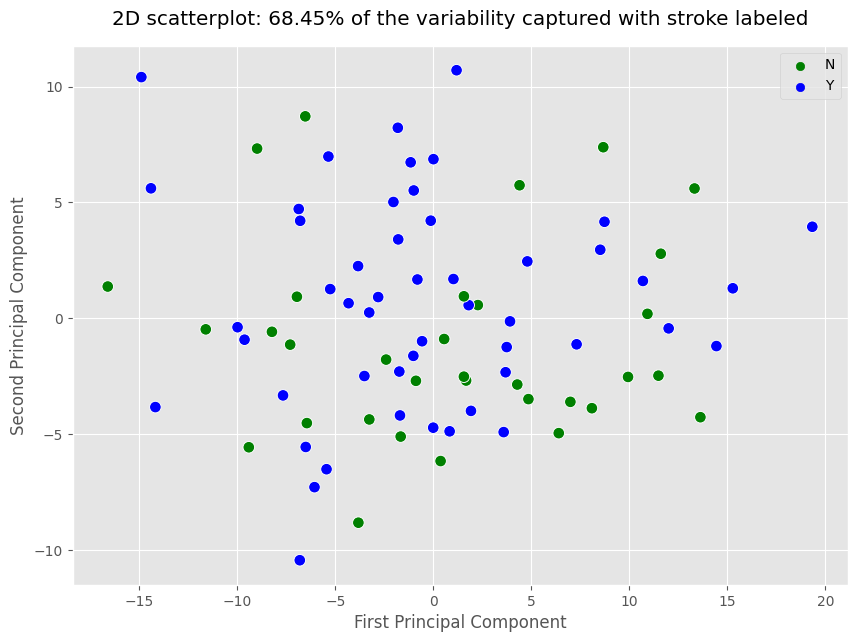

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_all[:, 0], y=X_pca_2_all[:, 1], s=70, hue=anticoagulant, palette=['green', 'blue'])

plt.title("2D scatterplot: 68.45% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

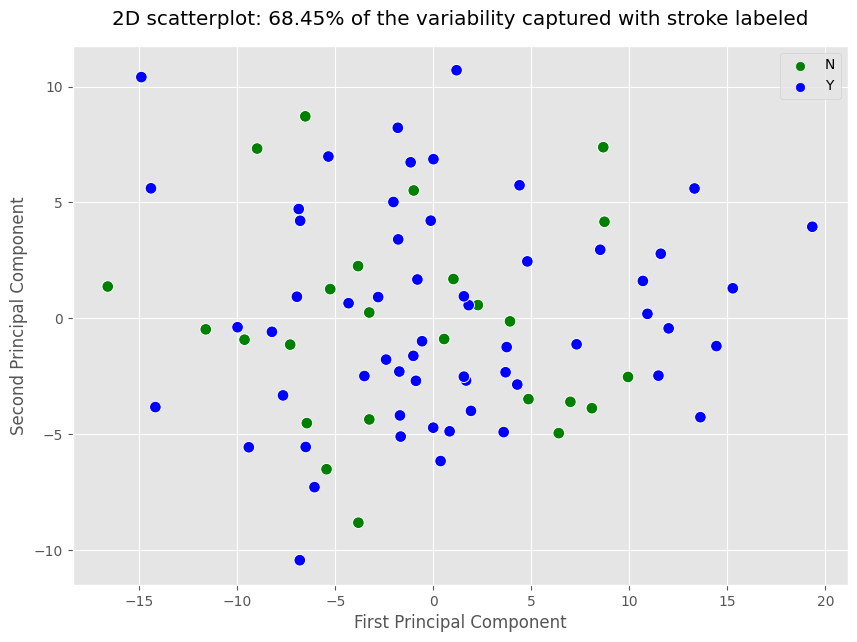

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_all[:, 0], y=X_pca_2_all[:, 1], s=70, hue=hypertension, palette=['green', 'blue'])

plt.title("2D scatterplot: 68.45% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

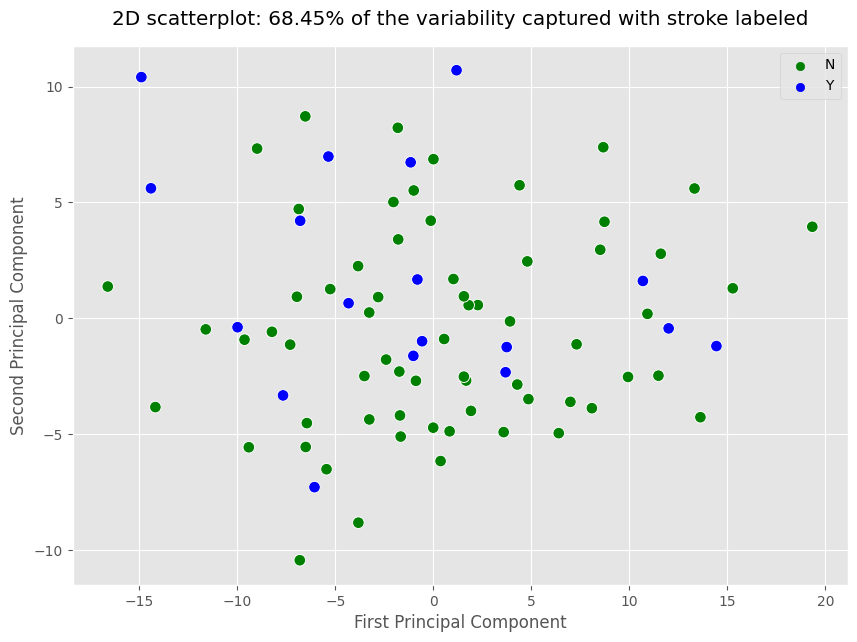

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_all[:, 0], y=X_pca_2_all[:, 1], s=70, hue=surgery, palette=['green', 'blue'])

plt.title("2D scatterplot: 68.45% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

In [ ]:
from sklearn.decomposition import PCA

pca_info_gain = PCA(n_components=45, random_state=2020)
pca_info_gain.fit(PCA_data_info_gain_scaled_dataframe)
X_pca_info_gain = pca_info_gain.transform(PCA_data_info_gain_scaled_dataframe)
X_pca_info_gain.shape

(83, 45)

In [ ]:
print("Variance explained by 45 principal components =", sum(pca_info_gain.explained_variance_ratio_ * 100))

Variance explained by 45 principal components = 100.00000000000001


In [ ]:
pca_info_gain.explained_variance_ratio_ * 100

array([4.94267629e+01, 1.80231262e+01, 7.45602071e+00, 5.05949255e+00,
       4.46992889e+00, 3.09417017e+00, 2.05840843e+00, 1.84022489e+00,
       1.55076226e+00, 1.12415169e+00, 9.68885402e-01, 8.10176794e-01,
       6.93383837e-01, 6.45291430e-01, 5.32808132e-01, 4.06649854e-01,
       3.27171449e-01, 2.93897716e-01, 2.43892525e-01, 1.88995244e-01,
       1.75787854e-01, 1.19194011e-01, 9.32706100e-02, 7.20561055e-02,
       6.59535740e-02, 4.82770247e-02, 4.52977869e-02, 3.44141447e-02,
       2.82046693e-02, 2.52985803e-02, 1.92042249e-02, 1.45441182e-02,
       1.26339119e-02, 8.32024498e-03, 6.41266584e-03, 5.82557283e-03,
       3.06319594e-03, 2.47810191e-03, 1.82053783e-03, 1.45283247e-03,
       1.14942545e-03, 7.23908963e-04, 3.74372130e-04, 4.14944365e-05,
       1.90254592e-19])

In [ ]:
np.cumsum(pca_info_gain.explained_variance_ratio_ * 100)

array([ 49.42676288,  67.44988907,  74.90590978,  79.96540233,
        84.43533122,  87.52950139,  89.58790982,  91.4281347 ,
        92.97889696,  94.10304865,  95.07193405,  95.88211085,
        96.57549468,  97.22078611,  97.75359424,  98.1602441 ,
        98.48741555,  98.78131326,  99.02520579,  99.21420103,
        99.38998889,  99.5091829 ,  99.60245351,  99.67450961,
        99.74046319,  99.78874021,  99.834038  ,  99.86845214,
        99.89665681,  99.92195539,  99.94115962,  99.95570374,
        99.96833765,  99.97665789,  99.98307056,  99.98889613,
        99.99195933,  99.99443743,  99.99625797,  99.9977108 ,
        99.99886022,  99.99958413,  99.99995851, 100.        ,
       100.        ])

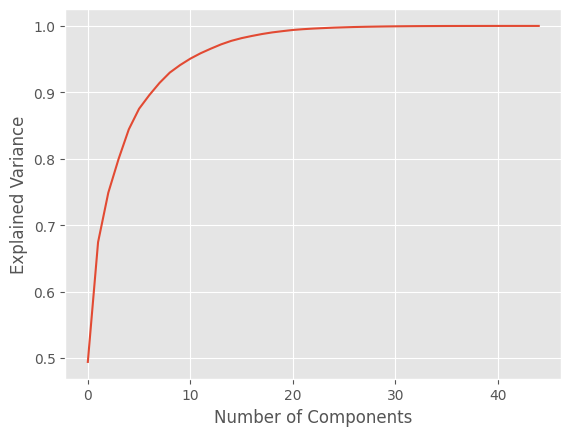

In [ ]:
plt.plot(np.cumsum(pca_info_gain.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.savefig('elbow_plot.png', dpi=100)

In [ ]:
pca_2_info_gain = PCA(n_components=2, random_state=2020)
pca_2_info_gain.fit(PCA_data_info_gain_scaled_dataframe)
X_pca_2_info_gain = pca_2_info_gain.transform(PCA_data_info_gain_scaled_dataframe)
X_pca_2_info_gain.shape

(83, 2)

In [ ]:
stroke_frame.to_csv('stroke_frame.csv', index=False)

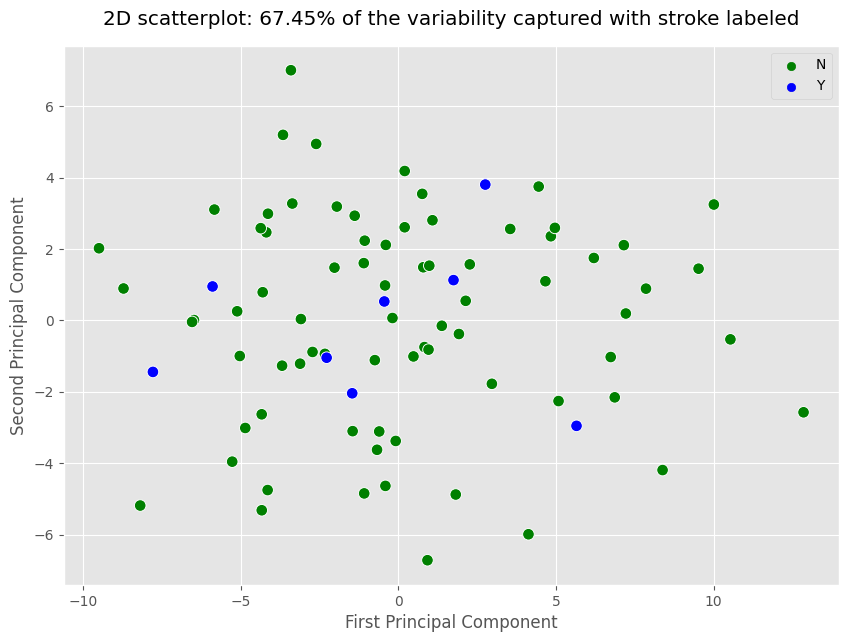

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_info_gain[:, 0], y=X_pca_2_info_gain[:, 1], s=70, hue=stroke, palette=['green', 'blue'])

plt.title("2D scatterplot: 67.45% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

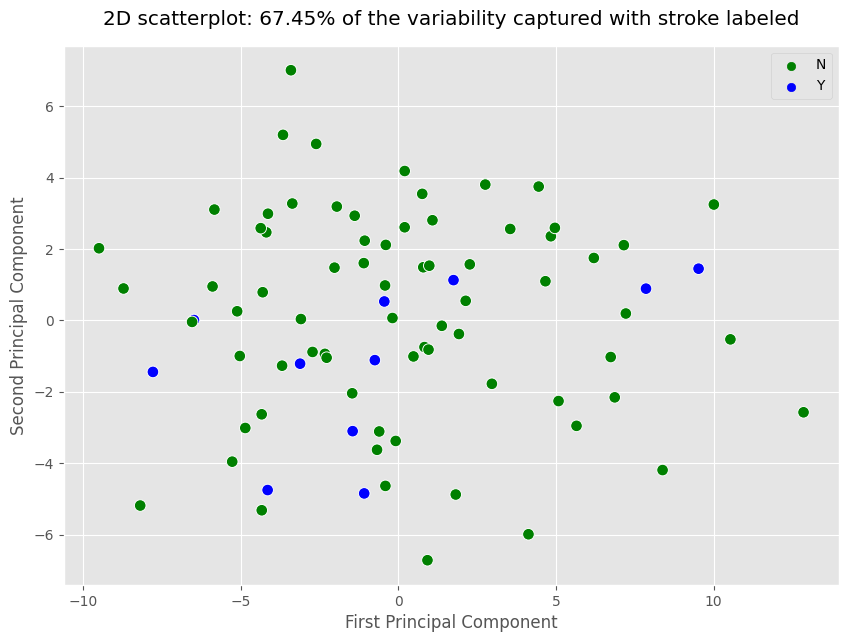

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_info_gain[:, 0], y=X_pca_2_info_gain[:, 1], s=70, hue=myocardial, palette=['green', 'blue'])

plt.title("2D scatterplot: 67.45% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

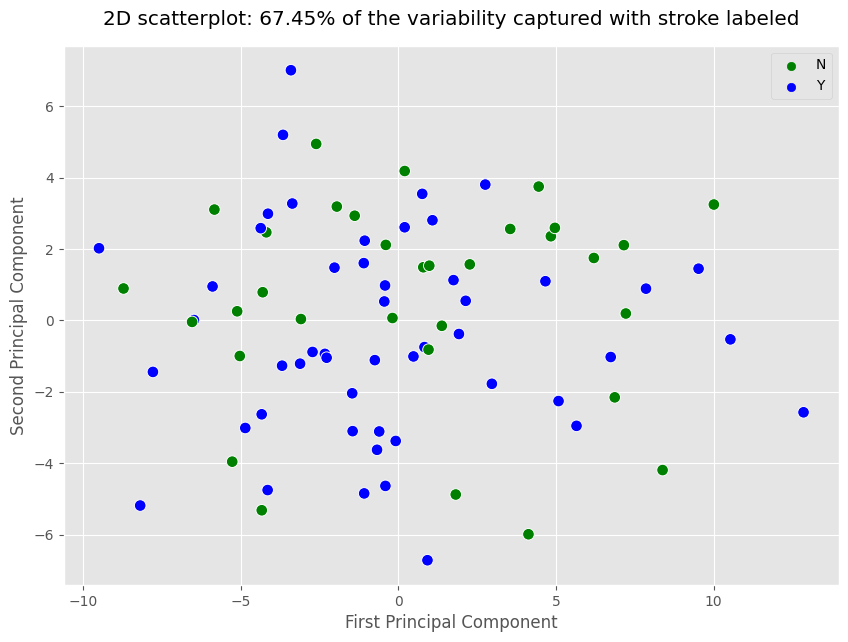

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_info_gain[:, 0], y=X_pca_2_info_gain[:, 1], s=70, hue=anticoagulant, palette=['green', 'blue'])

plt.title("2D scatterplot: 67.45% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

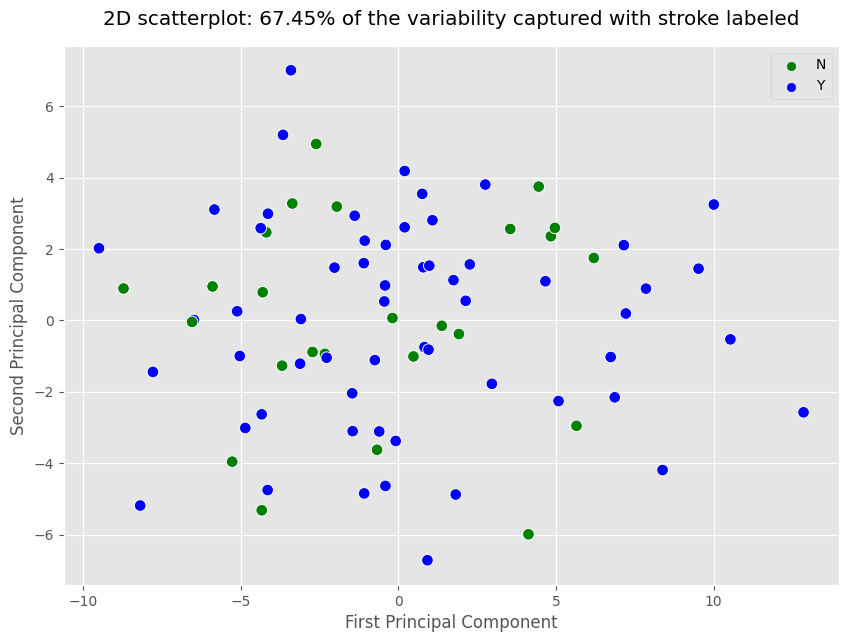

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_info_gain[:, 0], y=X_pca_2_info_gain[:, 1], s=70, hue=hypertension, palette=['green', 'blue'])

plt.title("2D scatterplot: 67.45% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

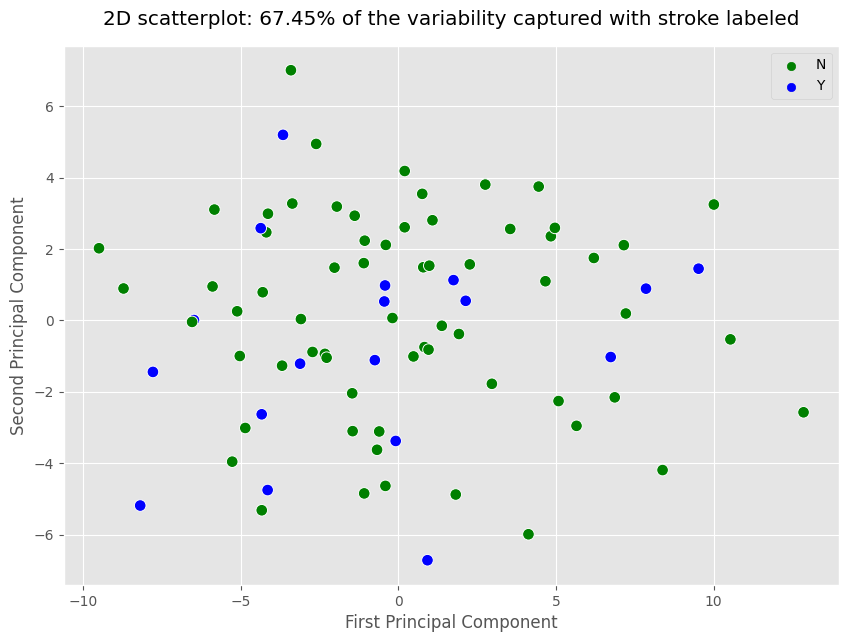

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_info_gain[:, 0], y=X_pca_2_info_gain[:, 1], s=70, hue=surgery, palette=['green', 'blue'])

plt.title("2D scatterplot: 67.45% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

In [ ]:
from sklearn.decomposition import PCA

pca_RFE = PCA(n_components=34, random_state=2020)
pca_RFE.fit(PCA_data_RFE_scaled_dataframe)
X_pca_RFE = pca_RFE.transform(PCA_data_RFE_scaled_dataframe)
X_pca_RFE.shape

(83, 34)

In [ ]:
print("Variance explained by 34 principal components =", sum(pca_RFE.explained_variance_ratio_ * 100))

Variance explained by 34 principal components = 99.99999999999999


In [ ]:
pca_RFE.explained_variance_ratio_ * 100

array([4.16909571e+01, 1.91456201e+01, 8.46374863e+00, 6.56789401e+00,
       5.08754029e+00, 3.68018024e+00, 3.05982057e+00, 2.58404052e+00,
       1.91793000e+00, 1.47545221e+00, 1.10206188e+00, 9.62195739e-01,
       7.81174009e-01, 6.78241127e-01, 5.49915064e-01, 4.97710084e-01,
       3.51187328e-01, 2.70210549e-01, 2.20729582e-01, 1.93949942e-01,
       1.65788753e-01, 1.01203864e-01, 9.65983305e-02, 8.83600362e-02,
       6.68967551e-02, 5.66939936e-02, 4.24213123e-02, 3.26582978e-02,
       2.34315630e-02, 2.04033260e-02, 1.27772747e-02, 6.74289486e-03,
       5.42417810e-03, 4.04203151e-05])

In [ ]:
np.cumsum(pca_RFE.explained_variance_ratio_ * 100)

array([ 41.6909571 ,  60.83657721,  69.30032584,  75.86821985,
        80.95576014,  84.63594038,  87.69576096,  90.27980148,
        92.19773148,  93.67318369,  94.77524558,  95.73744132,
        96.51861533,  97.19685645,  97.74677152,  98.2444816 ,
        98.59566893,  98.86587948,  99.08660906,  99.280559  ,
        99.44634775,  99.54755162,  99.64414995,  99.73250998,
        99.79940674,  99.85610073,  99.89852205,  99.93118034,
        99.95461191,  99.97501523,  99.98779251,  99.9945354 ,
        99.99995958, 100.        ])

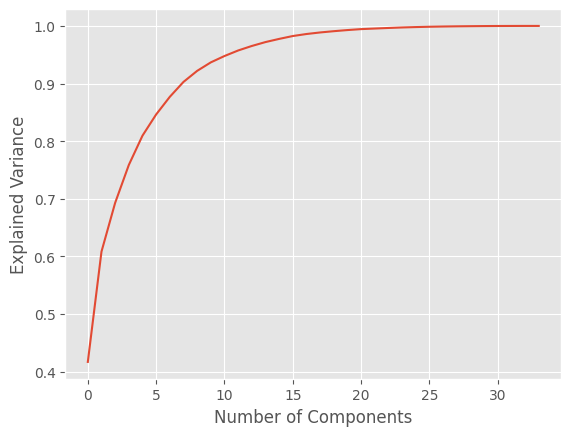

In [ ]:
plt.plot(np.cumsum(pca_RFE.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.savefig('elbow_plot.png', dpi=100)

In [ ]:
pca_2_RFE = PCA(n_components=2, random_state=2020)
pca_2_RFE.fit(PCA_data_RFE_scaled_dataframe)
X_pca_2_RFE = pca_2_RFE.transform(PCA_data_RFE_scaled_dataframe)
X_pca_2_RFE.shape

(83, 2)

In [ ]:
stroke_frame.to_csv('stroke_frame.csv', index=False)

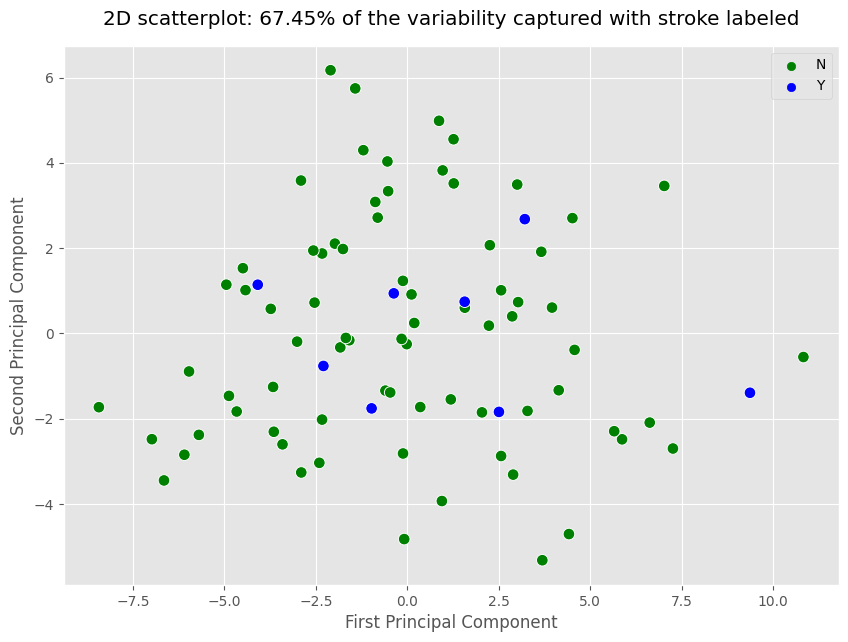

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_RFE[:, 0], y=X_pca_2_RFE[:, 1], s=70, hue=stroke, palette=['green', 'blue'])

plt.title("2D scatterplot: 60.84% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

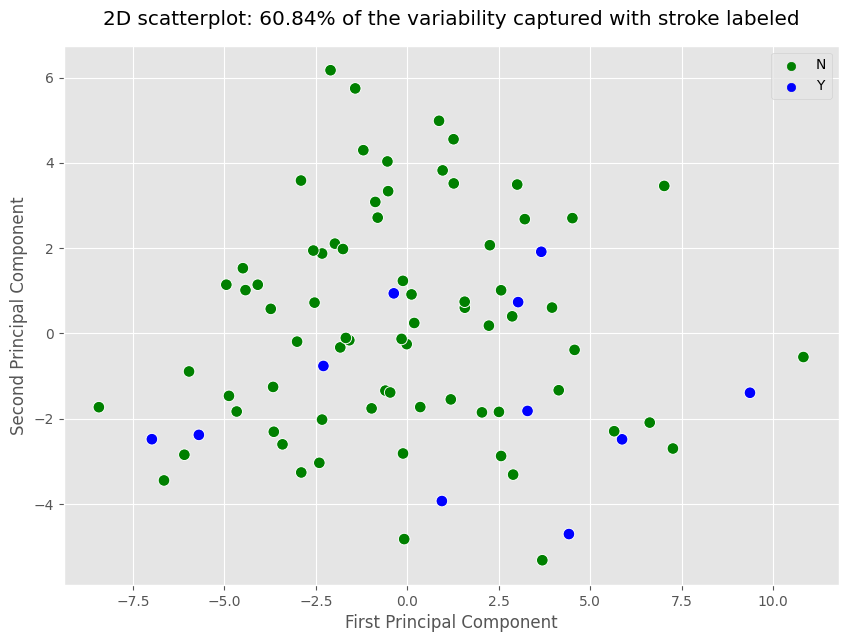

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_RFE[:, 0], y=X_pca_2_RFE[:, 1], s=70, hue=myocardial, palette=['green', 'blue'])

plt.title("2D scatterplot: 60.84% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

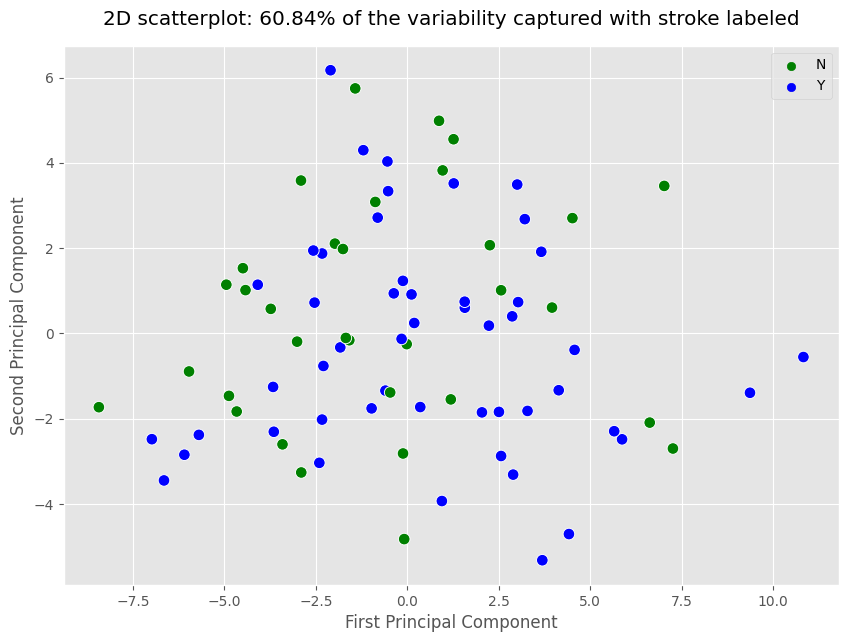

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_RFE[:, 0], y=X_pca_2_RFE[:, 1], s=70, hue=anticoagulant, palette=['green', 'blue'])

plt.title("2D scatterplot: 60.84% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

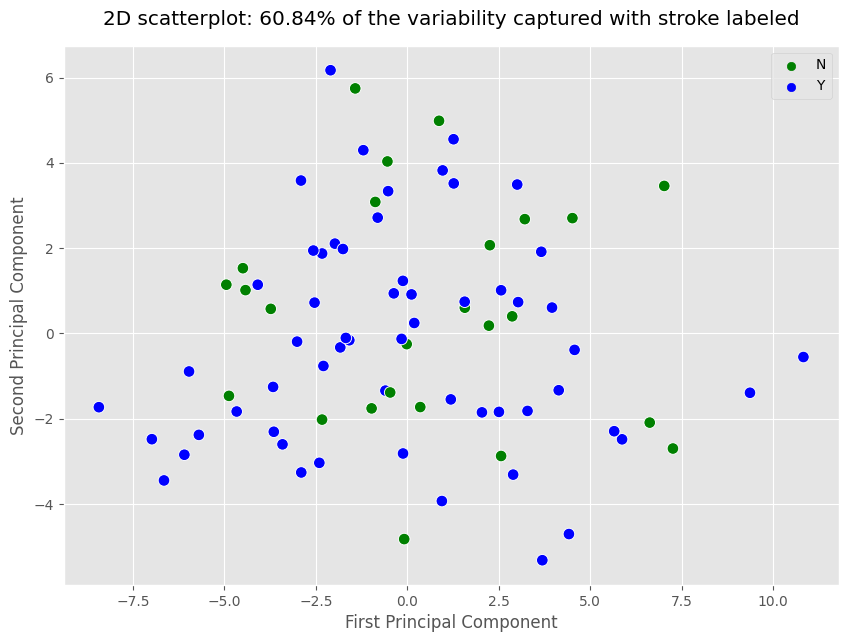

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_RFE[:, 0], y=X_pca_2_RFE[:, 1], s=70, hue=hypertension, palette=['green', 'blue'])

plt.title("2D scatterplot: 60.84% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

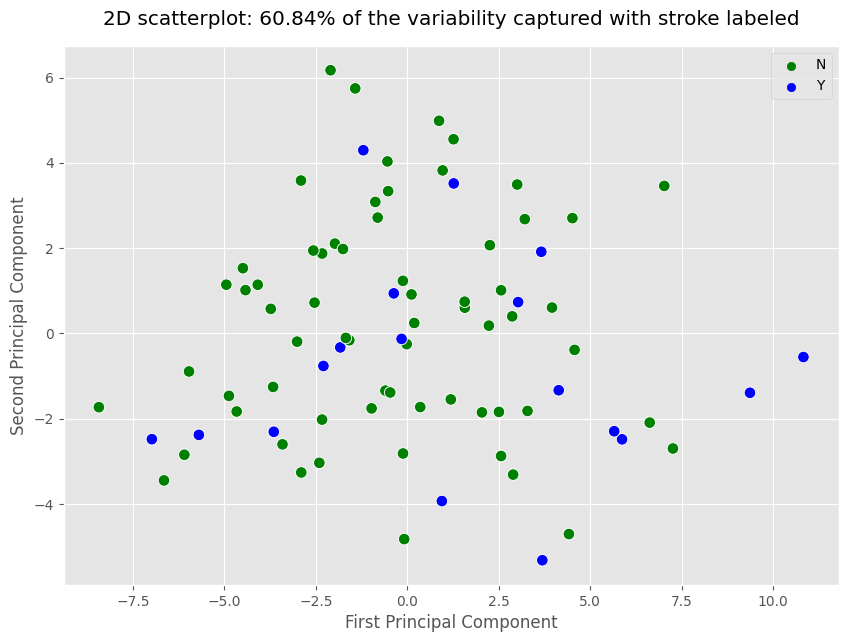

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2_RFE[:, 0], y=X_pca_2_RFE[:, 1], s=70, hue=surgery, palette=['green', 'blue'])

plt.title("2D scatterplot: 60.84% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

In [ ]:
pca_3_all = PCA(n_components=3, random_state=2020)
pca_3_all.fit(PCA_data_all_scaled_dataframe)
X_pca_3_all = pca_3_all.transform(PCA_data_all_scaled_dataframe)
X_pca_3_all.shape

(83, 3)

In [ ]:
import pandas as pd

master_sheet = pd.read_csv("PCA Master Sheet With 83.csv")
master_sheet_frame = pd.DataFrame(master_sheet)

stroke = []
myocardial = []
anticoagulant = []
hypertension = []
surgery = []

for i in range(83):
  if master_sheet_frame.iloc[i][7] == "Y":
    stroke.append(1)
  elif master_sheet_frame.iloc[i][7] == "N":
    stroke.append(2)
  else:
    stroke.append(3)

for i in range(83):
  if master_sheet_frame.iloc[i][9] == "Y":
    hypertension.append(1)
  elif master_sheet_frame.iloc[i][9] == "N":
    hypertension.append(2)
  else:
    hypertension.append(3)

for i in range(83):
  if master_sheet_frame.iloc[i][10] == "Y":
    anticoagulant.append(1)
  elif master_sheet_frame.iloc[i][10] == "N":
    anticoagulant.append(2)
  else:
    anticoagulant.append(3)

for i in range(83):
  if master_sheet_frame.iloc[i][12] == "Y":
    surgery.append(1)
  elif master_sheet_frame.iloc[i][12] == "N":
    surgery.append(2)
  else:
    surgery.append(3)

for i in range(83):
  if master_sheet_frame.iloc[i][13] == "Y":
    myocardial.append(1)
  elif master_sheet_frame.iloc[i][13] == "N":
    myocardial.append(2)
  else:
    myocardial.append(3)

#print(stroke)
stroke_frame = pd.DataFrame(stroke)
myocardial_frame = pd.DataFrame(myocardial)
anticoagulant_frame = pd.DataFrame(anticoagulant)
hypertension_frame = pd.DataFrame(hypertension)
surgery_frame = pd.DataFrame(surgery)


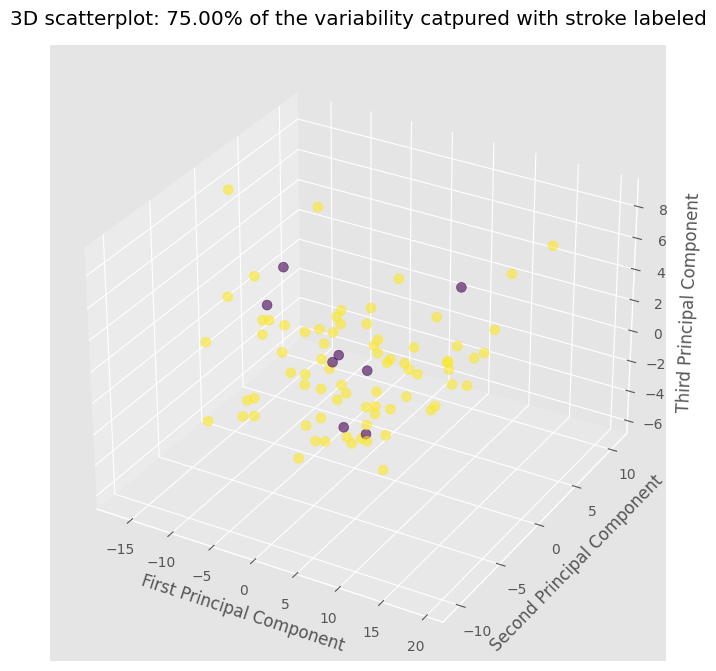

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_all[:, 0], X_pca_3_all[:, 1], X_pca_3_all[:,2], c = stroke, s=50, alpha=0.6)

plt.title("3D scatterplot: 75.00% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

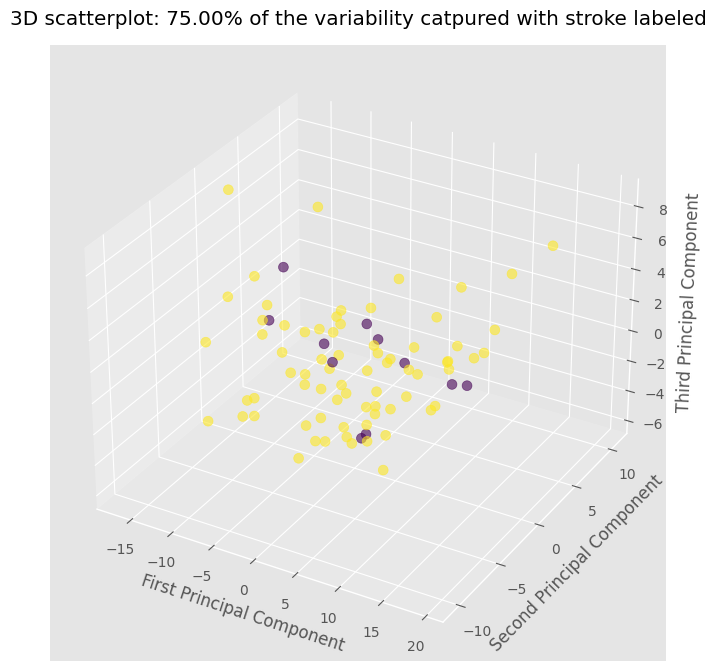

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_all[:, 0], X_pca_3_all[:, 1], X_pca_3_all[:,2], c = myocardial, s=50, alpha=0.6)

plt.title("3D scatterplot: 75.00% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

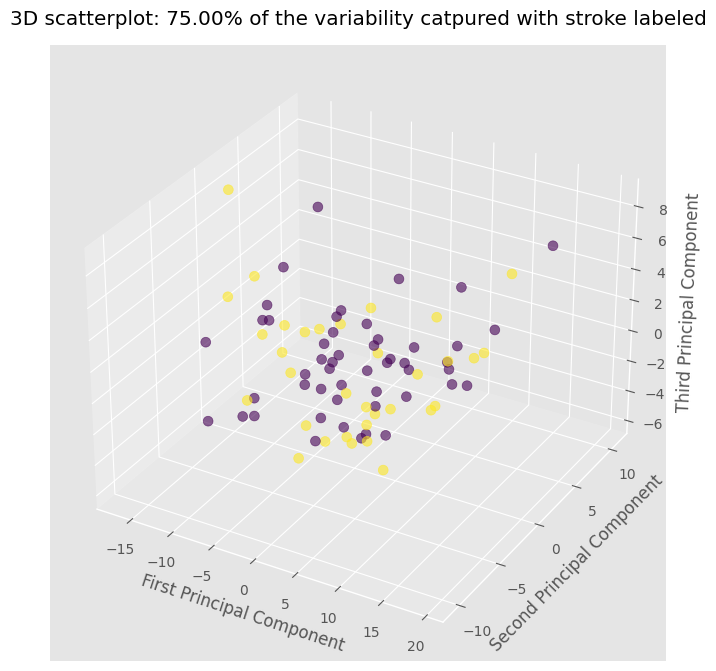

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_all[:, 0], X_pca_3_all[:, 1], X_pca_3_all[:,2], c = anticoagulant, s=50, alpha=0.6)

plt.title("3D scatterplot: 75.00% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

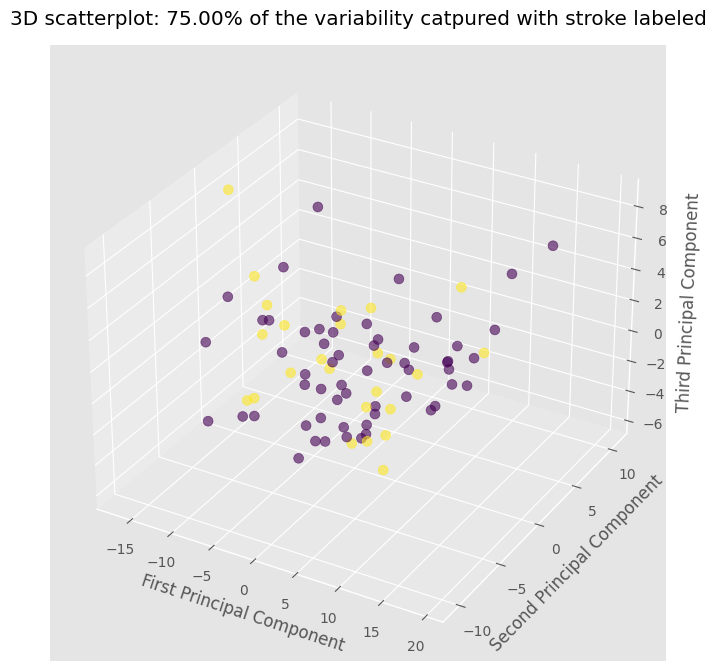

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_all[:, 0], X_pca_3_all[:, 1], X_pca_3_all[:,2], c = hypertension, s=50, alpha=0.6)

plt.title("3D scatterplot: 75.00% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

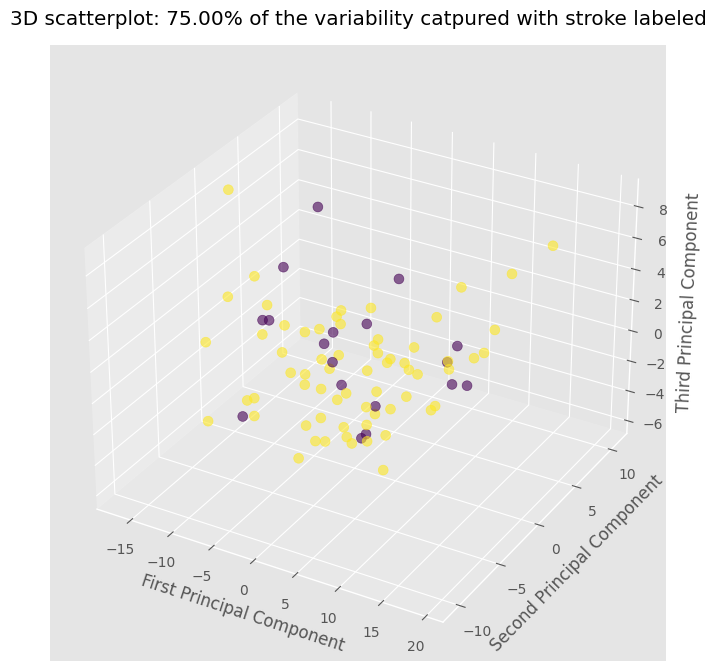

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_all[:, 0], X_pca_3_all[:, 1], X_pca_3_all[:,2], c = surgery, s=50, alpha=0.6)

plt.title("3D scatterplot: 75.00% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

In [ ]:
pca_3_info_gain = PCA(n_components=3, random_state=2020)
pca_3_info_gain.fit(PCA_data_info_gain_scaled_dataframe)
X_pca_3_info_gain = pca_3_info_gain.transform(PCA_data_info_gain_scaled_dataframe)
X_pca_3_info_gain.shape

(83, 3)

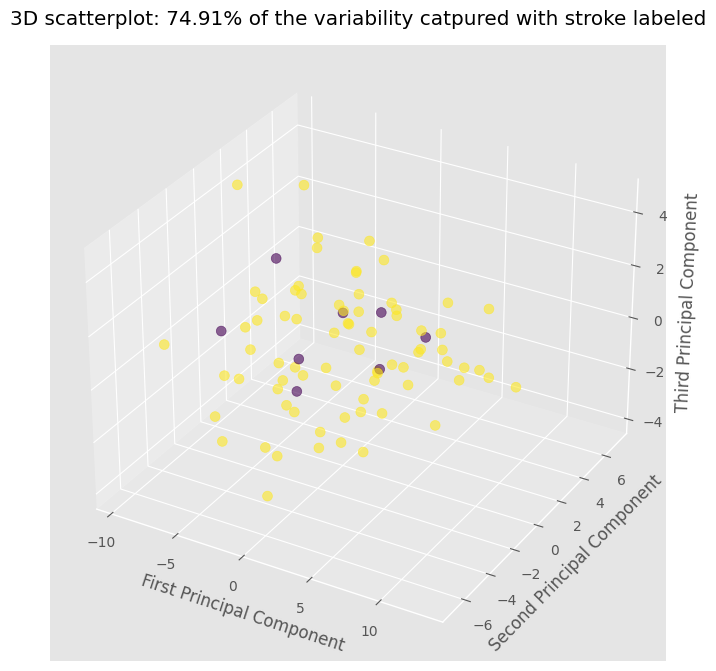

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_info_gain[:, 0], X_pca_3_info_gain[:, 1], X_pca_3_info_gain[:,2], c = stroke, s=50, alpha=0.6)

plt.title("3D scatterplot: 74.91% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

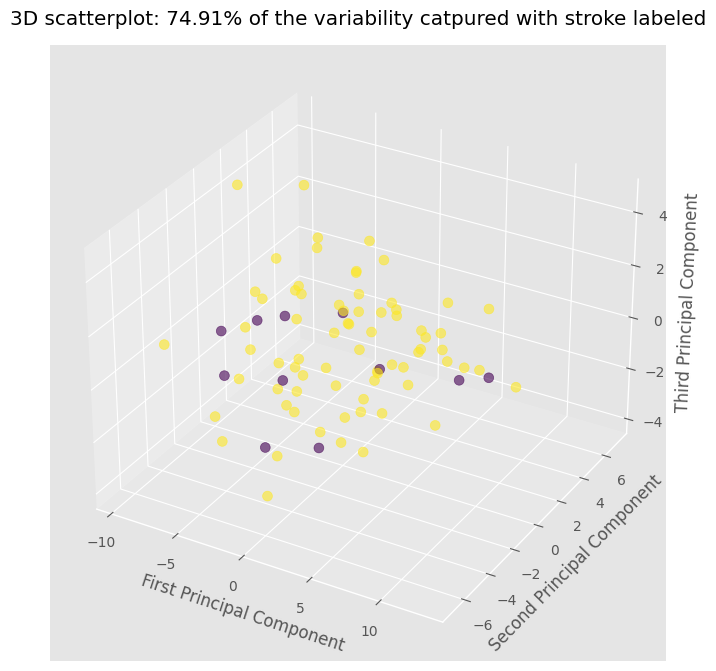

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_info_gain[:, 0], X_pca_3_info_gain[:, 1], X_pca_3_info_gain[:,2], c = myocardial, s=50, alpha=0.6)

plt.title("3D scatterplot: 74.91% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

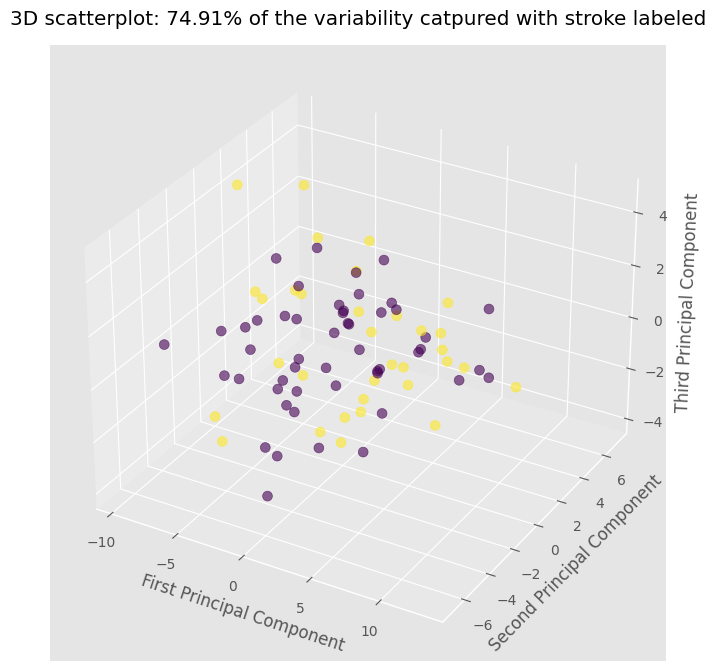

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_info_gain[:, 0], X_pca_3_info_gain[:, 1], X_pca_3_info_gain[:,2], c = anticoagulant, s=50, alpha=0.6)

plt.title("3D scatterplot: 74.91% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

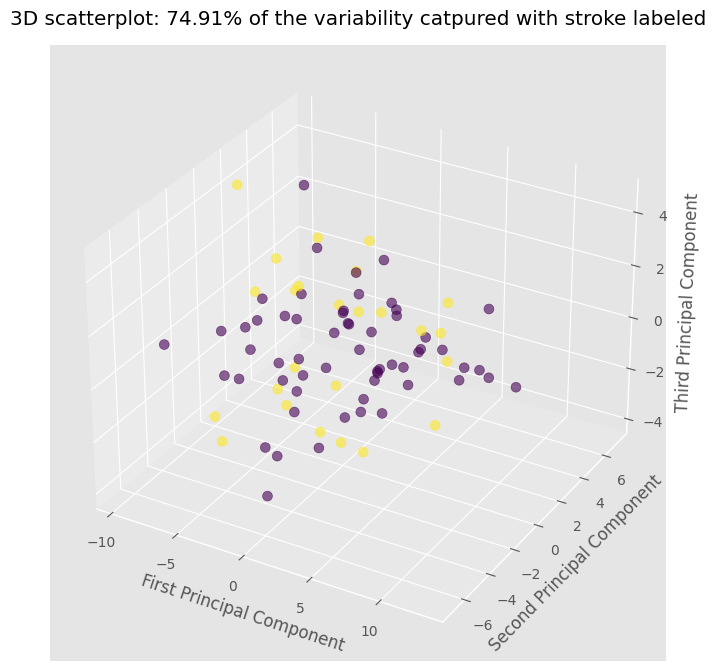

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_info_gain[:, 0], X_pca_3_info_gain[:, 1], X_pca_3_info_gain[:,2], c = hypertension, s=50, alpha=0.6)

plt.title("3D scatterplot: 74.91% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

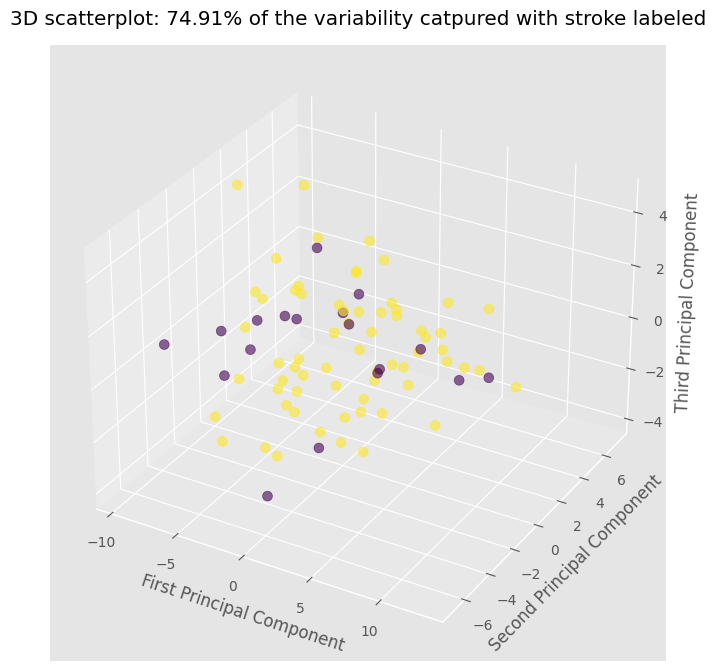

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_info_gain[:, 0], X_pca_3_info_gain[:, 1], X_pca_3_info_gain[:,2], c = surgery, s=50, alpha=0.6)

plt.title("3D scatterplot: 74.91% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

In [ ]:
pca_3_RFE = PCA(n_components=3, random_state=2020)
pca_3_RFE.fit(PCA_data_RFE_scaled_dataframe)
X_pca_3_RFE = pca_3_RFE.transform(PCA_data_RFE_scaled_dataframe)
X_pca_3_RFE.shape

(83, 3)

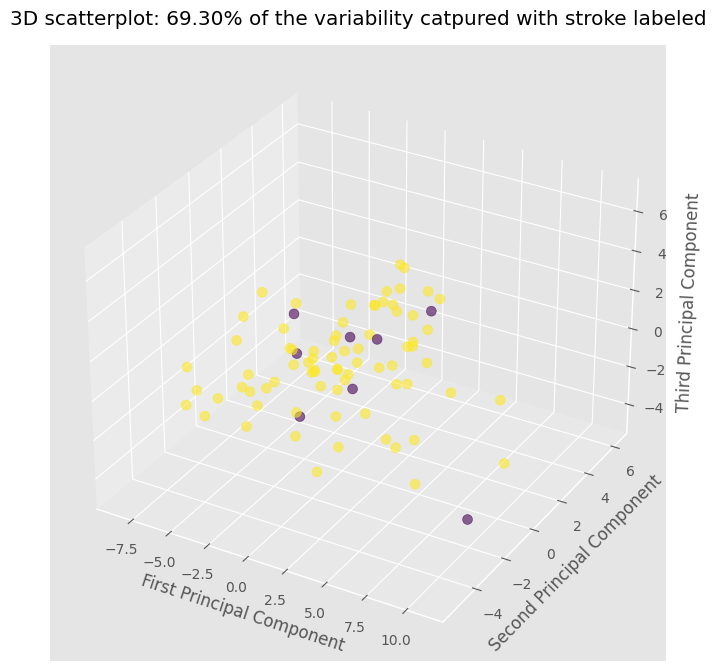

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_RFE[:, 0], X_pca_3_RFE[:, 1], X_pca_3_RFE[:,2], c = stroke, s=50, alpha=0.6)

plt.title("3D scatterplot: 69.30% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

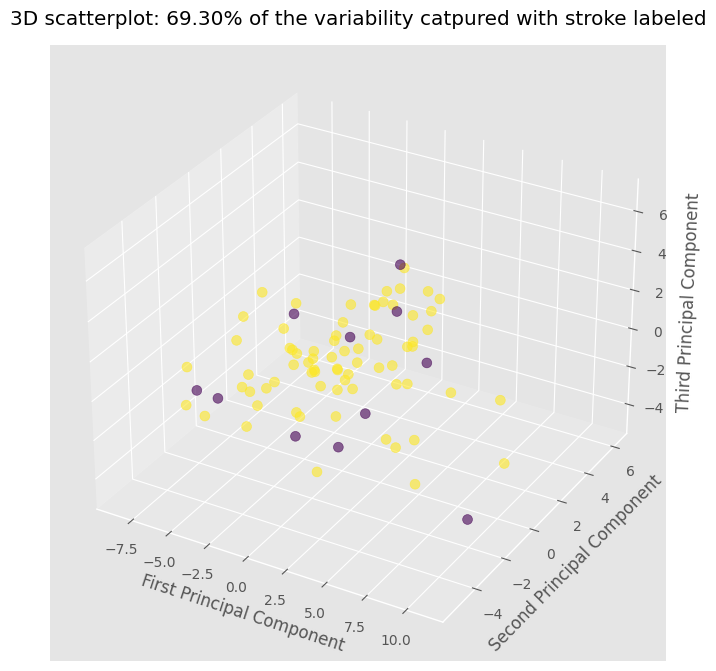

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_RFE[:, 0], X_pca_3_RFE[:, 1], X_pca_3_RFE[:,2], c = myocardial, s=50, alpha=0.6)

plt.title("3D scatterplot: 69.30% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

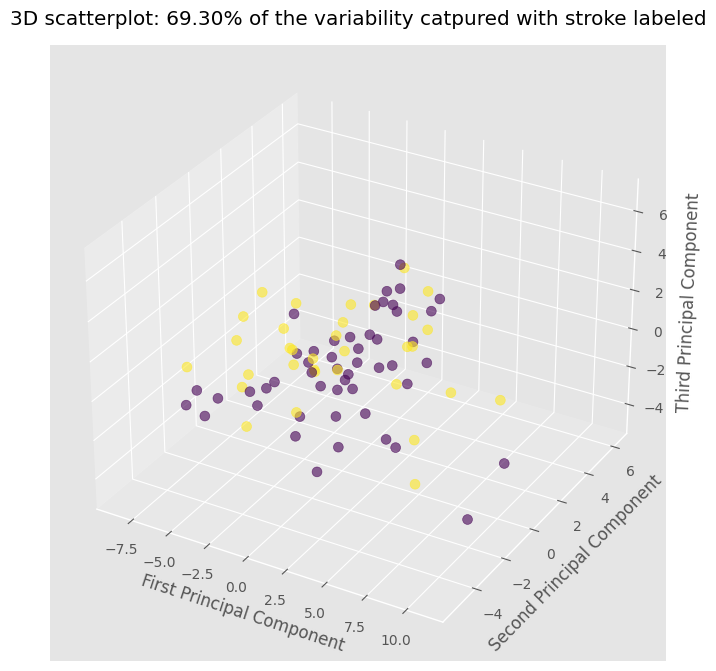

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_RFE[:, 0], X_pca_3_RFE[:, 1], X_pca_3_RFE[:,2], c = anticoagulant, s=50, alpha=0.6)

plt.title("3D scatterplot: 69.30% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

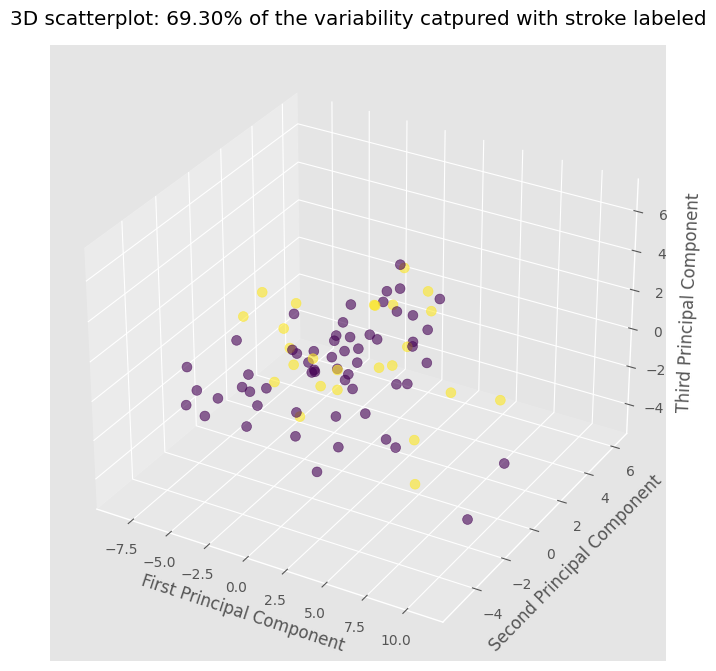

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_RFE[:, 0], X_pca_3_RFE[:, 1], X_pca_3_RFE[:,2], c = hypertension, s=50, alpha=0.6)

plt.title("3D scatterplot: 69.30% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

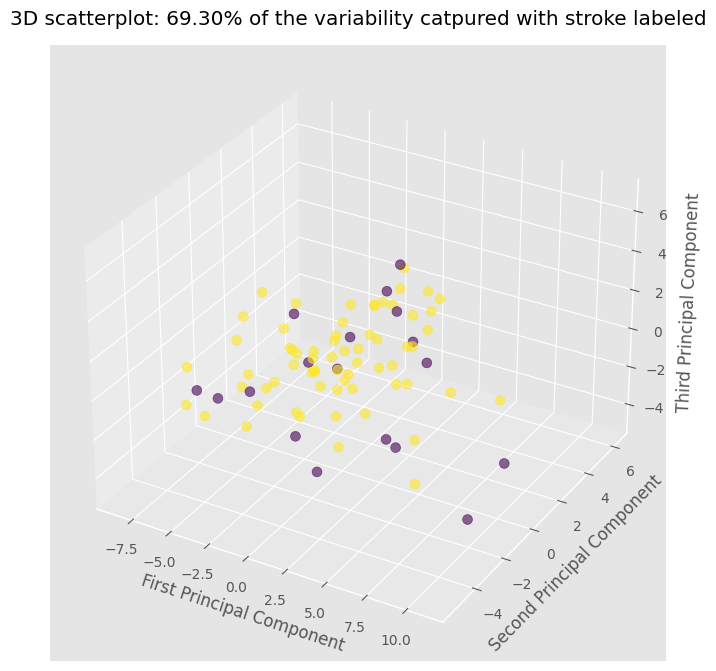

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3_RFE[:, 0], X_pca_3_RFE[:, 1], X_pca_3_RFE[:,2], c = surgery, s=50, alpha=0.6)

plt.title("3D scatterplot: 69.30% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")